# IPCC AR6 Interactive Atlas Datalab

***

> This notebook is a reproducibility example of the IPCC-WGI AR6 Interactive Atlas products. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Getting Started

**E. Cimadevilla**, **M. Iturbide** and **L. Sitz** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Spain).

This guideline is structured to assist you in harnessing the wealth of resources available within the **IPCC AR6 Interactive Atlas Datalab**, enabling you to conduct meaningful climate research and analysis. The datalab serves as a **reproducibility platform for the IPCC-WG-AR6 Interactive Atlas products**, facilitating not only the reproducibility but also the **reusability of the underlying data**. It offers **transparent access to a wide range of climate-related materials and data**, thereby promoting robust scientific investigations and supporting climate change assessment efforts.

### Contents in this notebook
1) Aim and motivation
2) Description of the available material within the IPCC-Hub
3) Data loading and basic data operations
   * 3.1. Library loading
   * 3.2. Data loading
   * 3.3. The structure of the *climate4R* grid
   * 3.4. Initial Data Exploration Plots
   * 3.5. Calculation of anomalies (future projections - historical simulations)
   * 3.6. Spatial aggregation

In [1]:
import os
import xarray
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### 1. Aim and motivation

The **IPCC AR6 Interactive Atlas Datalab** aims to support the reproducibility and reusability of the data underlying the Interactive Atlas of the IPCC-WGI.

It leverages the latest technologies to provide an efficient research environment that accelerates data analysis. This is achieved by integrating data storage and computational resources with ready-to-use software frameworks.

By utilizing these new technologies, climate data analysis can become more efficient, and the legacy of project results can be extended for the benefit of society. 

### 2. Description of the available material within the datalab

The datalab is more than just a computing resource; it encompasses **data, software, and notebooks** that facilitate the reproducibility of the IPCC-WGI AR6 Atlas results. Additionally, this material enables the reusability of data, thereby extending the analysis provided by the IPCC-WGI Interactive Atlas.

#### Data

The inventory (`inventory.csv`) catalogs the list of files of the [**the IPCC-WGI AR6 Interactive Atlas Dataset**](https://interactive-atlas.ipcc.ch/), originally published at [**DIGITAL.CSIC**](https://digital.csic.es/handle/10261/280324) for the long-term archival, and also available through the Copernicus Data Store (**CDS**). 

In [2]:
df = pd.read_csv("../inventory.csv")
df.head()

,location,type,variable,project,experiment,frequency
0,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,pr,CORDEX-ANT,historical,mon
1,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,tn,CORDEX-ANT,historical,mon
2,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,rx1day,CORDEX-ANT,historical,mon
3,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,tx,CORDEX-ANT,historical,mon
4,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,txx,CORDEX-ANT,historical,mon


To open a file, find the `location` of your dataset in the inventory and open it with `xarray`.

In [3]:
subset = df.query('type == "opendap" & variable == "pr" & project == "CMIP6" & experiment == "historical"')
location = subset["location"].iloc[0]
location

'https://hub.climate4r.ifca.es/thredds/dodsC/ipcc/ar6/atlas/ia-monthly/CMIP6/historical/pr_CMIP6_historical_mon_185001-201412.nc'

In [4]:
cmip6_historical_pr = xarray.open_dataset(location)
cmip6_historical_pr["pr"]

<xarray.DataArray 'pr' (member: 34, time: 1980, lat: 180, lon: 360)> Size: 17GB
[4362336000 values with dtype=float32]
Coordinates:
  * member   (member) |S64 2kB b'CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1' ... b'MOHC...
  * time     (time) datetime64[ns] 16kB 1850-01-01 1850-02-01 ... 2014-12-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  lwe_thickness_of_precipitation_amount
    units:          mm
    cell_methods:   time: sum within days time: mean over days area: mean
    long_name:      Monthly mean of daily accumulated precipitation
    comment:        Monthly mean of daily accumulated precipitation of liquid...
    grid_mapping:   crs

Or the description of the index, the corresponding units and the time resolution.

In [5]:
cmip6_historical_pr["pr"].attrs

{'standard_name': 'lwe_thickness_of_precipitation_amount',
 'units': 'mm',
 'cell_methods': 'time: sum within days time: mean over days area: mean',
 'long_name': 'Monthly mean of daily accumulated precipitation',
 'comment': 'Monthly mean of daily accumulated precipitation of liquid water equivalent from all phases',
 'grid_mapping': 'crs'}

Please be aware that some variables pertains to an annual index, whereas **the majority of variables and indices are on a monthly basis**. For instance, the extreme precipitation:

In [6]:
cmip6_historical_pr["time"][:10]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', '1850-04-01T00:00:00.000000000',
       '1850-05-01T00:00:00.000000000', '1850-06-01T00:00:00.000000000',
       '1850-07-01T00:00:00.000000000', '1850-08-01T00:00:00.000000000',
       '1850-09-01T00:00:00.000000000', '1850-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 1850-01-01 1850-02-01 ... 1850-10-01
Attributes:
    standard_name:  time
    axis:           T
    long_name:      time
    bounds:         time_bnds

### 3. Data loading and basic data operations

In [7]:
cmip6_hist = xarray.open_dataset(location).sel(
    lon=slice(-10,4),
    lat=slice(36,44),
    time=slice("18500101", "19001231"))

# Summer
cmip6_hist = cmip6_hist.sel(time=(cmip6_hist.time.dt.month.isin([6,7,8])))
cmip6_hist["pr"]

<xarray.DataArray 'pr' (member: 34, time: 153, lat: 8, lon: 14)> Size: 2MB
[582624 values with dtype=float32]
Coordinates:
  * member   (member) |S64 2kB b'CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1' ... b'MOHC...
  * time     (time) datetime64[ns] 1kB 1850-06-01 1850-07-01 ... 1900-08-01
  * lat      (lat) float64 64B 36.5 37.5 38.5 39.5 40.5 41.5 42.5 43.5
  * lon      (lon) float64 112B -9.5 -8.5 -7.5 -6.5 -5.5 ... 0.5 1.5 2.5 3.5
Attributes:
    standard_name:  lwe_thickness_of_precipitation_amount
    units:          mm
    cell_methods:   time: sum within days time: mean over days area: mean
    long_name:      Monthly mean of daily accumulated precipitation
    comment:        Monthly mean of daily accumulated precipitation of liquid...
    grid_mapping:   crs

#### 3.4. Initial Data Exploration Plots

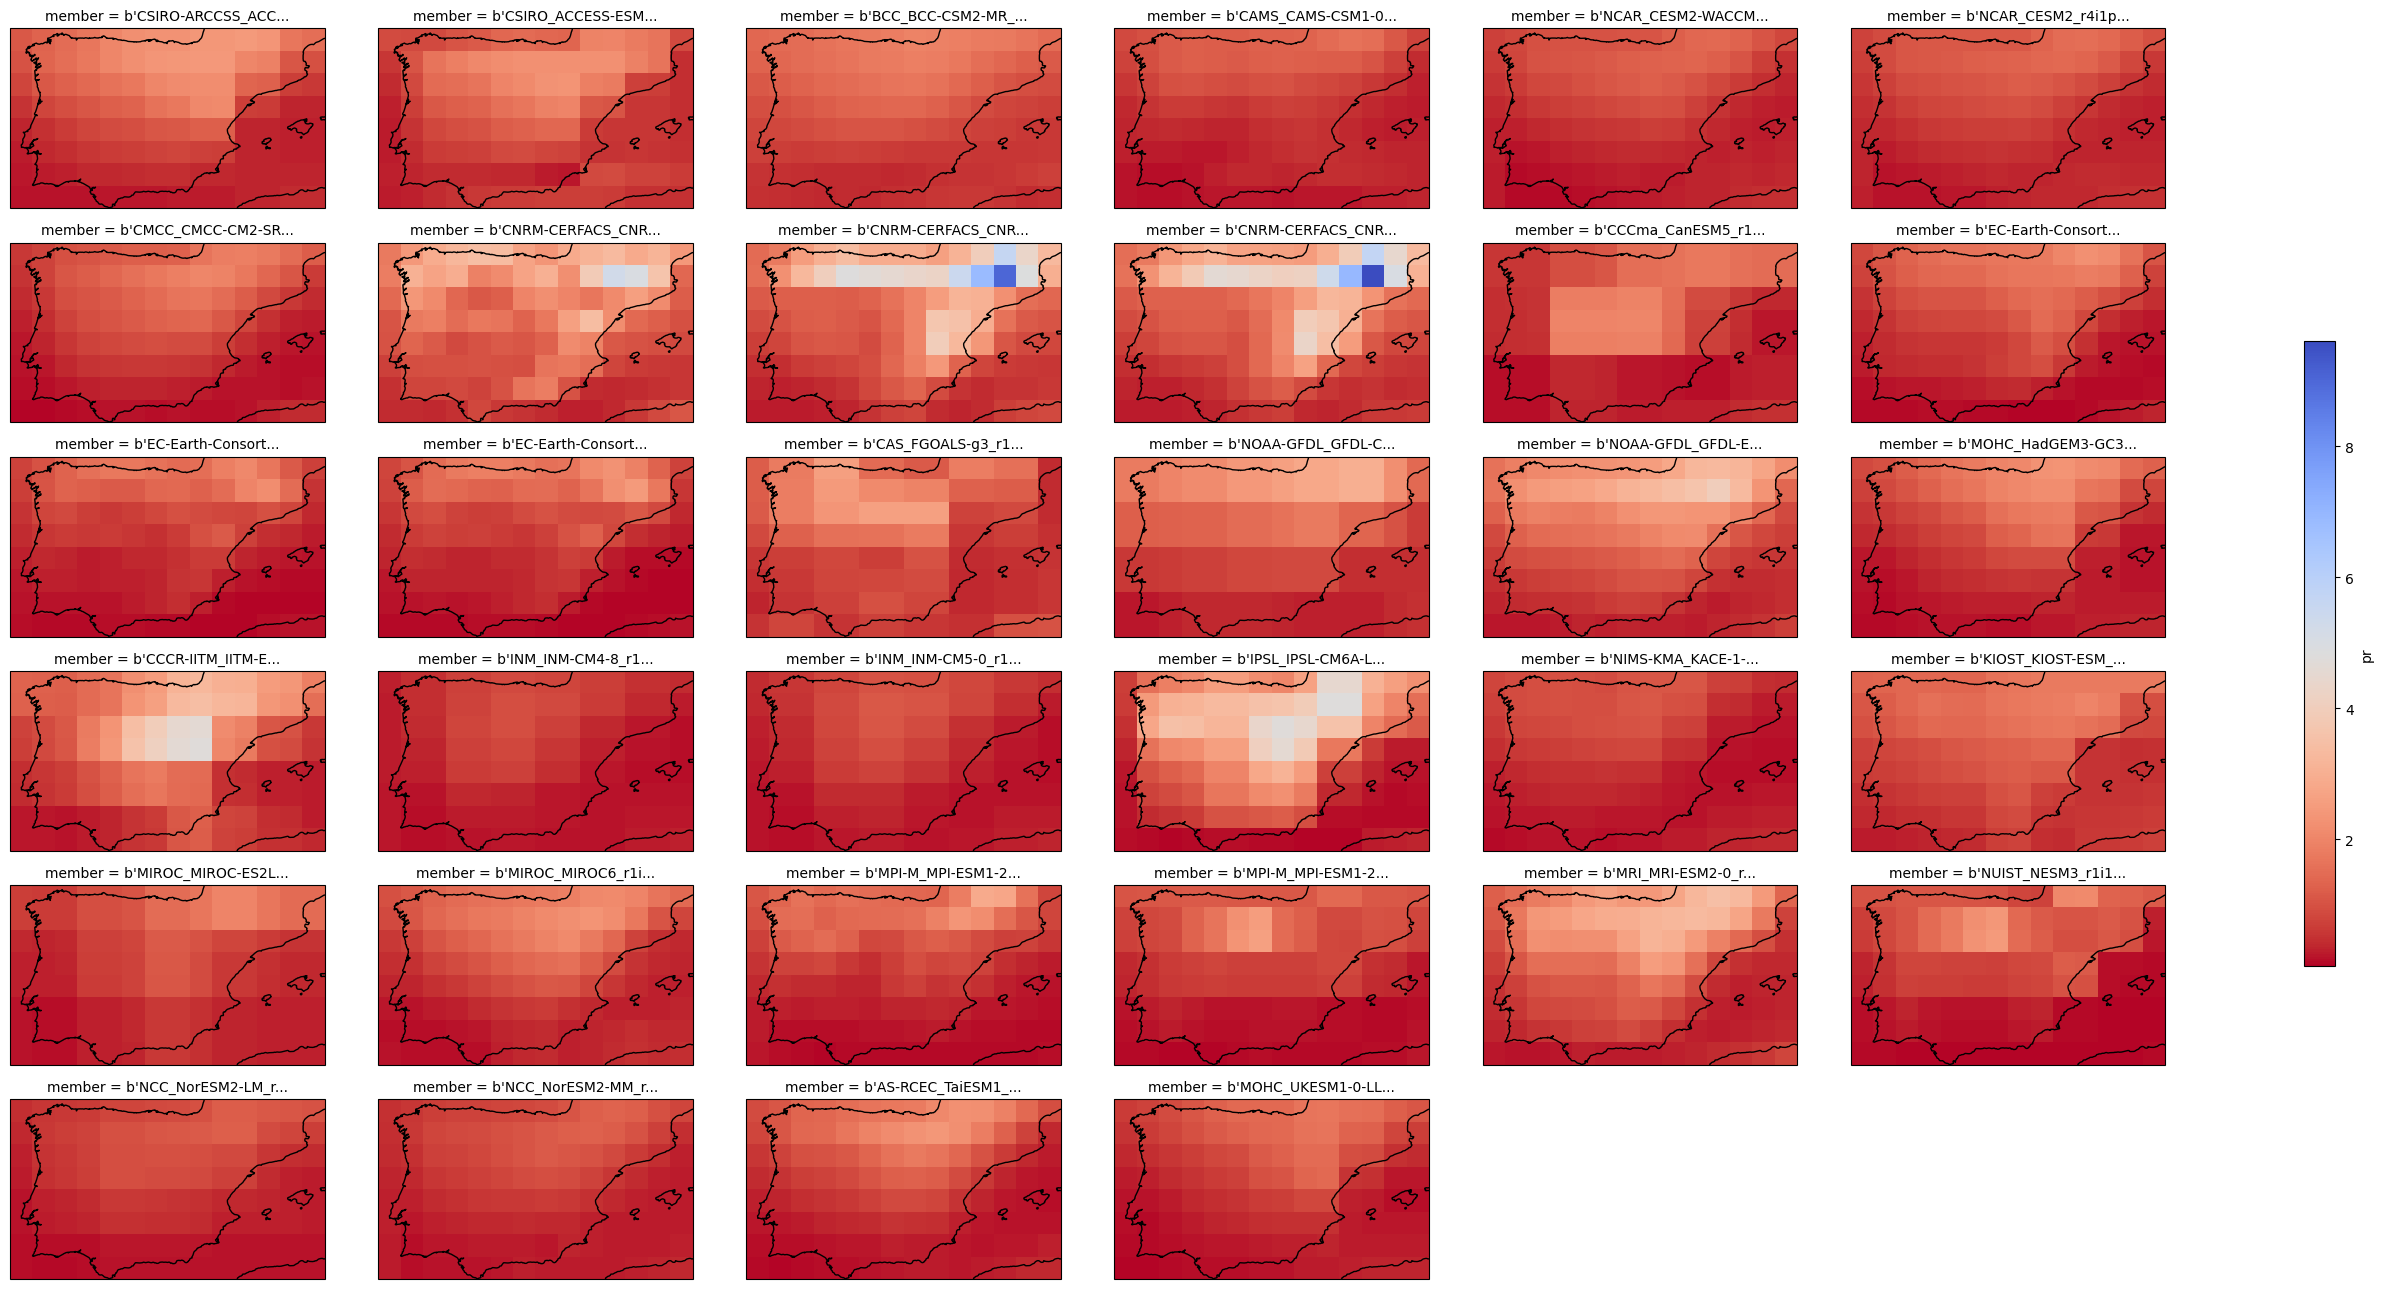

In [8]:
plot = cmip6_hist["pr"].mean("time").plot(
    x="lon", y="lat", col="member", col_wrap=6,
    figsize=(28,13),
    add_colorbar=True,
    cmap="coolwarm_r",
    cbar_kwargs={"shrink": .5},
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=0)),
    transform=ccrs.PlateCarree())

for ax in plot.axs.flatten():
    ax.coastlines()
    ax.set_extent((-10,4,36,44), ccrs.PlateCarree())

We could also display the temporal series for the original monthly values...

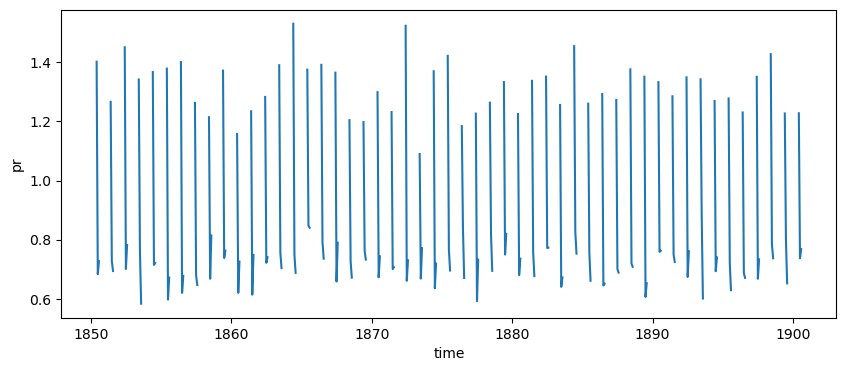

In [9]:
cmip6_hist["pr"].mean(["lat", "lon", "member"]).reindex(time=cmip6_historical_pr["time"]).plot(figsize=(10,4))

...or the aggregated yearly values.

In [10]:
avg = cmip6_hist["pr"].resample({"time": "YE"}).mean().mean(["lat", "lon", "member"])
spread = (
    cmip6_hist["pr"].mean(["lat", "lon"]).resample({"time": "YE"}).mean().max(["member"]) -
    cmip6_hist["pr"].mean(["lat", "lon"]).resample({"time": "YE"}).mean().min(["member"]))

stats = xarray.concat([avg,spread], "stat").assign_coords({"stat": ["avg", "spread"]}).to_dataframe().reset_index()

Text(0.5, 1.0, 'Summer mean precipitation (mm/day) in the preindustrial era in the Iberian Peninsula.')

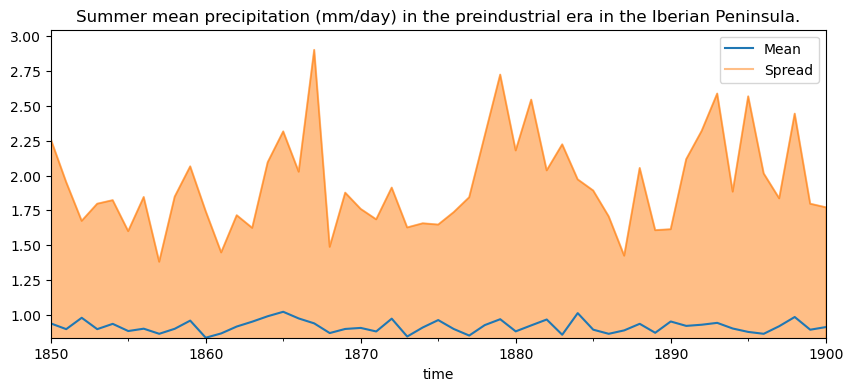

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

stats[stats["stat"]=="avg"].plot.line(x="time", y="pr", ax=ax)
stats[stats["stat"]=="spread"].plot.area(x="time", y="pr", ax=ax, alpha = .5)

plt.ylim(bottom=stats["pr"].min())
plt.legend(["Mean", "Spread"])
plt.title("Summer mean precipitation (mm/day) in the preindustrial era in the Iberian Peninsula.")

#### 3.5. Calculation of anomalies (future projections - historical simulations)

We will now calculate the relative precipitation anomaly of a fixed future period (e.g. 2041-2060) relative to the preindustrial period. We will consider the SSP585 mitigation scenario.

In [12]:
subset = df.query('type == "opendap" & variable == "pr" & project == "CMIP6" & experiment == "ssp585"')
location = subset["location"].iloc[0]

cmip6_fut = xarray.open_dataset(location).sel(
    lon=slice(-10,4),
    lat=slice(36,44),
    time=slice("20410101", "20601231"))

# Summer
cmip6_fut = cmip6_fut.sel(time=(cmip6_fut.time.dt.month.isin([6,7,8])))
cmip6_fut["pr"]

<xarray.DataArray 'pr' (member: 33, time: 60, lat: 8, lon: 14)> Size: 887kB
[221760 values with dtype=float32]
Coordinates:
  * member   (member) |S64 2kB b'CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1' ... b'MOHC...
  * time     (time) datetime64[ns] 480B 2041-06-01 2041-07-01 ... 2060-08-01
  * lat      (lat) float64 64B 36.5 37.5 38.5 39.5 40.5 41.5 42.5 43.5
  * lon      (lon) float64 112B -9.5 -8.5 -7.5 -6.5 -5.5 ... 0.5 1.5 2.5 3.5
Attributes:
    standard_name:  lwe_thickness_of_precipitation_amount
    units:          mm
    cell_methods:   time: sum within days time: mean over days area: mean
    long_name:      Monthly mean of daily accumulated precipitation
    comment:        Monthly mean of daily accumulated precipitation of liquid...
    grid_mapping:   crs

We can combine the output with the historical data in the same time-series plot:

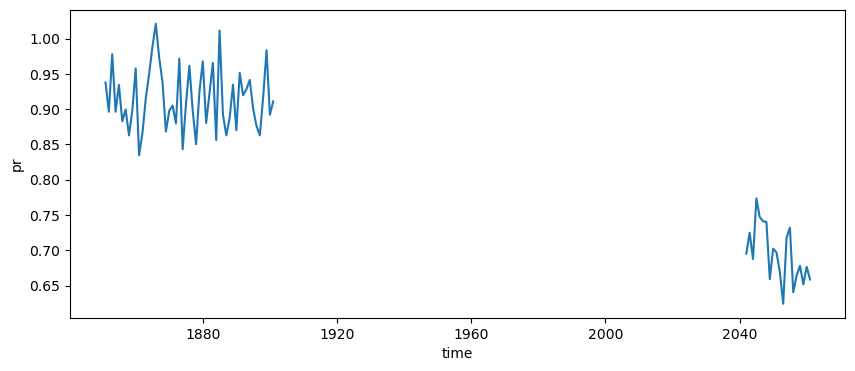

In [13]:
cmip6_hist.combine_first(cmip6_fut)["pr"].resample({"time": "YE"}).mean().mean(["member", "lat", "lon"]).plot(figsize=(10,4))

Now we can calculate the anomaly by computing the difference between both climatologies:

In [14]:
anom = cmip6_fut["pr"].mean("time") - cmip6_hist["pr"].mean("time")
rel_anom = anom / cmip6_hist.mean("time") * 100

Finally, we can plot the output using an appropriate palette for the `color.theme`:

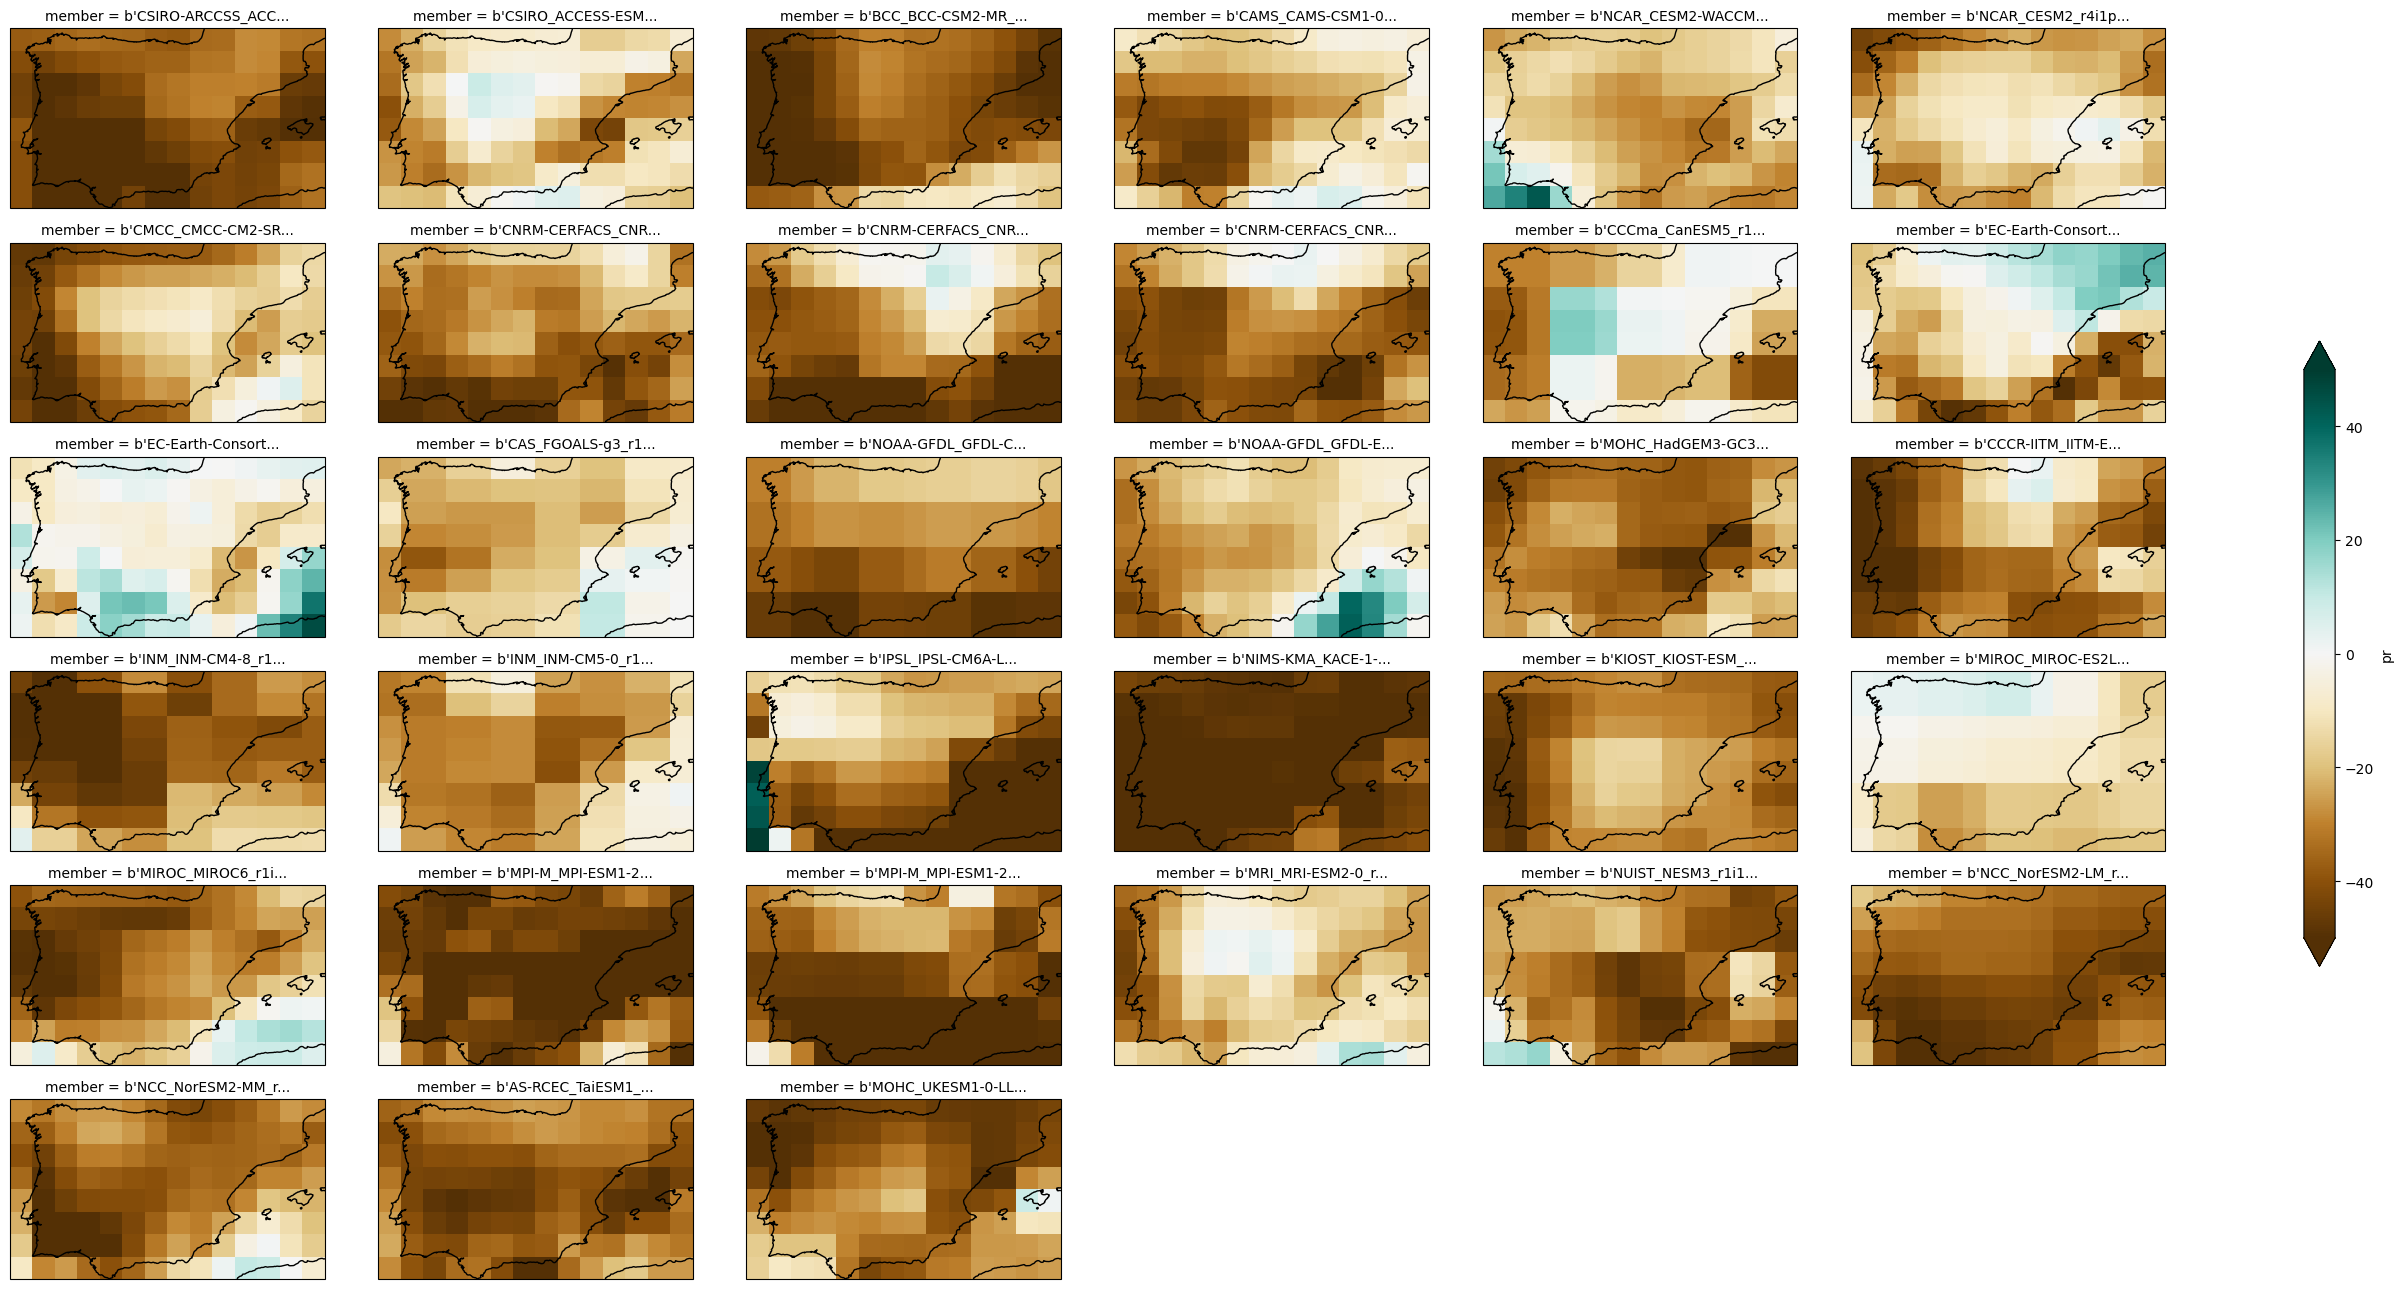

In [15]:
plot = rel_anom["pr"].plot(
    x="lon", y="lat", col="member", col_wrap=6,
    figsize=(28,13),
    add_colorbar=True,
    cmap="BrBG",
    cbar_kwargs={"shrink": .5},
    vmin=-50, vmax=50,
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=0)),
    transform=ccrs.PlateCarree())

for ax in plot.axs.flatten():
    ax.coastlines()
    ax.set_extent((-10,4,36,44), ccrs.PlateCarree())

We can do the same for the multi-model ensemble mean by previously applying the `aggregateGrid` function:

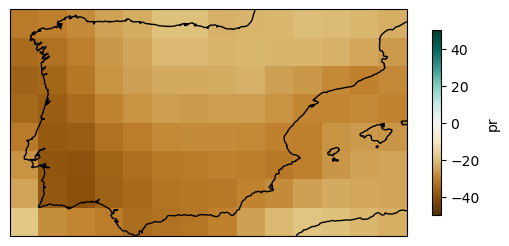

In [16]:
plot = rel_anom["pr"].mean("member").plot(
    add_colorbar=True,
    cmap="BrBG",
    cbar_kwargs={"shrink": .5},
    vmin=-50, vmax=50,
    subplot_kws=dict(projection=ccrs.PlateCarree(central_longitude=0)),
    transform=ccrs.PlateCarree())

plot.axes.coastlines()

#### 3.6. Spatial aggregation

The time series plots we have created above, automatically performs spatial aggregations. However, we can control this operation by using the `aggr.spatial` parameter in the `aggregateGrid` function, which by default calculates weighted values according to the latitude. If we aggregate the `rel.anom` object, we will get a single value per model (member). 

In [17]:
weights =  np.cos(np.deg2rad(rel_anom["lat"]))
rel_anom_regional_mean = rel_anom.weighted(weights).mean(["lat", "lon"])

In [18]:
print("Mean: %2.2f\nP25: %2.2f\nP75: %2.2f" % (
    rel_anom_regional_mean["pr"].mean().item(),
    rel_anom_regional_mean["pr"].quantile(.25).item(),
    rel_anom_regional_mean["pr"].quantile(.75).item()))

Mean: -27.98
P25: -35.44
P75: -17.38


<Axes: >

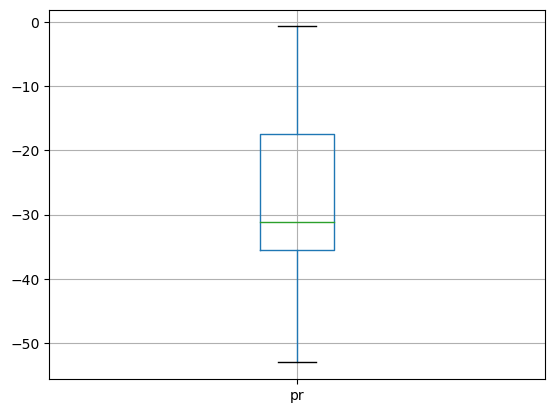

In [19]:
rel_anom_regional_mean["pr"].to_dataframe().boxplot()